In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import os
import cv2
from keras.preprocessing.image import img_to_array


Using TensorFlow backend.


In [2]:
from PIL import Image

## Photos file loading

In [3]:
with open('../yelp_photos/yelp_academic_dataset_photo.json', 'r') as f:
    data = f.readlines()
    
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"
photos = pd.read_json(data_json_str)

In [4]:
photos.head()

,business_id,caption,label,photo_id
0,wRKYaVXTks43GVSI2awTQA,,food,IuXwafFH3fZlTyXA-poz0w
1,wRKYaVXTks43GVSI2awTQA,,food,vhnZ58_1shy9HNVdZgtMLw
2,wRKYaVXTks43GVSI2awTQA,,food,j9ad7H2IBEzhfNCuJu4ukg
3,wRKYaVXTks43GVSI2awTQA,,food,du-5X44HccQ9Zo3pQPiFgQ
4,wRKYaVXTks43GVSI2awTQA,The classic Farmer's Choice Breakfast has a li...,food,u7Tt1nvclYNoq3UOToP-GA


In [5]:
photos.caption[280963]

'Beef shawarma plate with rice, hummus and Greek salad yummy!!!'

In [6]:
photos.groupby(['label']).count()

,business_id,caption,photo_id
label,,,
drink,10350,10350,10350
food,184456,184456,184456
inside,61620,61620,61620
menu,1352,1352,1352
outside,23214,23214,23214


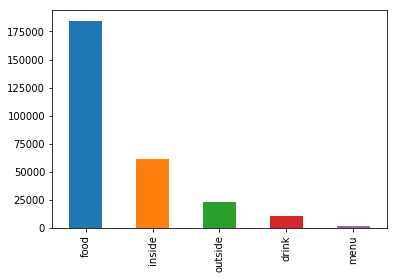

In [7]:
photos['label'].value_counts().plot.bar()

# we only used 3000 images per category for classification 

In [8]:
drink=photos[photos['label']=='drink'][:1000]
food=photos[photos['label']=='food'][:1000]
inside=photos[photos['label']=='inside'][:1000]
menu=photos[photos['label']=='menu'][:1000]
outside=photos[photos['label']=='outside'][:1000]


In [9]:
df=pd.concat([drink,food,inside,menu,outside])

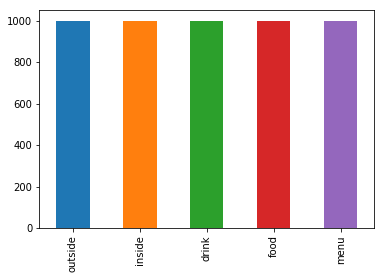

In [10]:
df['label'].value_counts().plot.bar()

In [11]:
datapath = '../yelp_photos/yelp_academic_dataset_photos/'

In [12]:
for i,row in df.iterrows() :
    if row['photo_id'] =='mwVy69OHnx1V28Kc6lb--g' :
        print(True)

True


In [13]:
df.head()

,business_id,caption,label,photo_id
23,gbLMIGbBx5aGmV6F7Yp9-w,Horchata Milk Shake,drink,mwVy69OHnx1V28Kc6lb--g
45,1xEFOt8ArF0k4cpqWUk9gg,,drink,IcFm9H0VB1fMAYH9yKaquQ
70,A21FJqt8jIE6w0hdzmvnmg,,drink,U21rDRx-DPTtRvCow1vOvw
99,nwjIvTxJt2GpMoKzuKWIBQ,,drink,WggFMGicvTII7vvLKFKWwQ
140,2Hp-7pC5FkOpcS_utf-olg,,drink,pmEcZvGVYWfsTsjGAiPN3w


In [ ]:
data = []
labels = []
for root, dirs, files in os.walk(datapath):  
    for i,row in df.iterrows() :    
        for filename in files:
            if row['photo_id'] == os.path.splitext(filename)[0] :
                try:
                    label=df.loc[df['photo_id'] == os.path.splitext(filename)[0]]['label']
                    image = cv2.imread(os.path.join(datapath, filename))
                    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    resized_image = cv2.resize(gray_image, (48, 48)) 
                    image = img_to_array(resized_image)
                    data.append(image)
                    labels.append(label)
                    print(count)
                except Exception as e:
                    print(e)
            

In [58]:
categories=[]
for i in range(0, len(labels)):
    label= labels[i].values[0]
    categories.append(label)

In [59]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(categories)
categories=le.transform(categories)

In [75]:
data2 = np.array(data, dtype="float") / 255.0
categories = np.array(categories)

In [76]:
(trainX, testX, trainY, testY) = train_test_split(data2,
    categories, test_size=0.25, random_state=42)

In [77]:
 # convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=5)
testY = to_categorical(testY, num_classes=5)

In [78]:
 # construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=90, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [79]:
from keras.preprocessing.image import load_img
import math
import random
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
from keras.models import Sequential
from keras.layers import  Convolution2D,Conv2D, MaxPooling2D, AveragePooling2D,ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
from keras.callbacks import ModelCheckpoint
import tensorflow as tf 
from sklearn.metrics import confusion_matrix
from keras.utils import Sequence

from keras import layers
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
import tensorflow as tf 
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
filepath=os.getcwd()+'/../models/weights.yelpImage-v0.1.h5'

In [81]:
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(48, 48, 1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [85]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])


In [94]:
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [95]:
BS = 64
# train the network
print("[INFO] training network...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
                        validation_data=(testX, testY),callbacks=callbacks_list, 
                        steps_per_epoch=len(trainX) // BS,
                        epochs=3000, verbose=1)
scores = model.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

[INFO] training network...
Epoch 1/3000
58/58 [==============================] - 8s 132ms/step - loss: 1.4410 - acc: 0.3734 - val_loss: 1.4278 - val_acc: 0.3776

Epoch 00001: val_acc improved from -inf to 0.37760, saving model to /media/emna/datapartition/yelp/notebooks/../models/weights.yelpImage-v0.1.h5
Epoch 2/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.4515 - acc: 0.3667 - val_loss: 1.4183 - val_acc: 0.3928

Epoch 00002: val_acc improved from 0.37760 to 0.39280, saving model to /media/emna/datapartition/yelp/notebooks/../models/weights.yelpImage-v0.1.h5
Epoch 3/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.4426 - acc: 0.3693 - val_loss: 1.4118 - val_acc: 0.3952

Epoch 00003: val_acc improved from 0.39280 to 0.39520, saving model to /media/emna/datapartition/yelp/notebooks/../models/weights.yelpImage-v0.1.h5
Epoch 4/3000
58/58 [==============================] - 1s 20ms/step - loss: 1.4537 - acc: 0.3775 - val_loss: 1.4128 - val_acc: 0.3

58/58 [==============================] - 1s 20ms/step - loss: 1.3814 - acc: 0.4050 - val_loss: 1.3509 - val_acc: 0.4216

Epoch 00040: val_acc did not improve from 0.42640
Epoch 41/3000
58/58 [==============================] - 1s 20ms/step - loss: 1.3752 - acc: 0.4069 - val_loss: 1.3667 - val_acc: 0.4200

Epoch 00041: val_acc did not improve from 0.42640
Epoch 42/3000
58/58 [==============================] - 1s 20ms/step - loss: 1.3892 - acc: 0.4024 - val_loss: 1.3471 - val_acc: 0.4144

Epoch 00042: val_acc did not improve from 0.42640
Epoch 43/3000
58/58 [==============================] - 1s 20ms/step - loss: 1.3858 - acc: 0.4042 - val_loss: 1.3622 - val_acc: 0.4200

Epoch 00043: val_acc did not improve from 0.42640
Epoch 44/3000
58/58 [==============================] - 1s 20ms/step - loss: 1.3813 - acc: 0.4024 - val_loss: 1.3463 - val_acc: 0.4280

Epoch 00044: val_acc improved from 0.42640 to 0.42800, saving model to /media/emna/datapartition/yelp/notebooks/../models/weights.yelpImage


Epoch 00081: val_acc did not improve from 0.46400
Epoch 82/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.3465 - acc: 0.4265 - val_loss: 1.3156 - val_acc: 0.4568

Epoch 00082: val_acc did not improve from 0.46400
Epoch 83/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.3393 - acc: 0.4268 - val_loss: 1.3001 - val_acc: 0.4592

Epoch 00083: val_acc did not improve from 0.46400
Epoch 84/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.3378 - acc: 0.4427 - val_loss: 1.3185 - val_acc: 0.4488

Epoch 00084: val_acc did not improve from 0.46400
Epoch 85/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.3322 - acc: 0.4363 - val_loss: 1.3018 - val_acc: 0.4632

Epoch 00085: val_acc did not improve from 0.46400
Epoch 86/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.3407 - acc: 0.4322 - val_loss: 1.2944 - val_acc: 0.4688

Epoch 00086: val_acc improved from 0.46400 to 0.46880, saving model to /me

58/58 [==============================] - 1s 22ms/step - loss: 1.2125 - acc: 0.5091 - val_loss: 1.2506 - val_acc: 0.5168

Epoch 00166: val_acc did not improve from 0.52400
Epoch 167/3000
58/58 [==============================] - 1s 22ms/step - loss: 1.2097 - acc: 0.5020 - val_loss: 1.1445 - val_acc: 0.5240

Epoch 00167: val_acc improved from 0.52400 to 0.52400, saving model to /media/emna/datapartition/yelp/notebooks/../models/weights.yelpImage-v0.1.h5
Epoch 168/3000
58/58 [==============================] - 1s 22ms/step - loss: 1.2297 - acc: 0.4985 - val_loss: 1.1391 - val_acc: 0.5360

Epoch 00168: val_acc improved from 0.52400 to 0.53600, saving model to /media/emna/datapartition/yelp/notebooks/../models/weights.yelpImage-v0.1.h5
Epoch 169/3000
58/58 [==============================] - 1s 22ms/step - loss: 1.2089 - acc: 0.5154 - val_loss: 1.2534 - val_acc: 0.4512

Epoch 00169: val_acc did not improve from 0.53600
Epoch 170/3000
58/58 [==============================] - 1s 21ms/step - loss


Epoch 00250: val_acc did not improve from 0.57840
Epoch 251/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.0793 - acc: 0.5683 - val_loss: 1.2596 - val_acc: 0.4952

Epoch 00251: val_acc did not improve from 0.57840
Epoch 252/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.0937 - acc: 0.5622 - val_loss: 1.2902 - val_acc: 0.4976

Epoch 00252: val_acc did not improve from 0.57840
Epoch 253/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.0753 - acc: 0.5771 - val_loss: 1.2008 - val_acc: 0.5272

Epoch 00253: val_acc did not improve from 0.57840
Epoch 254/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.0842 - acc: 0.5654 - val_loss: 1.4778 - val_acc: 0.4424

Epoch 00254: val_acc did not improve from 0.57840
Epoch 255/3000
58/58 [==============================] - 1s 21ms/step - loss: 1.0833 - acc: 0.5797 - val_loss: 1.1547 - val_acc: 0.5536

Epoch 00255: val_acc did not improve from 0.57840
Epoch 256/3000
58/5


Epoch 00337: val_acc did not improve from 0.61200
Epoch 338/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.9888 - acc: 0.6220 - val_loss: 1.2941 - val_acc: 0.5048

Epoch 00338: val_acc did not improve from 0.61200
Epoch 339/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.9739 - acc: 0.6247 - val_loss: 1.3051 - val_acc: 0.5120

Epoch 00339: val_acc did not improve from 0.61200
Epoch 340/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.9916 - acc: 0.6189 - val_loss: 1.1610 - val_acc: 0.5512

Epoch 00340: val_acc did not improve from 0.61200
Epoch 341/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.9501 - acc: 0.6304 - val_loss: 1.3009 - val_acc: 0.5208

Epoch 00341: val_acc did not improve from 0.61200
Epoch 342/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.9832 - acc: 0.6187 - val_loss: 1.2380 - val_acc: 0.5392

Epoch 00342: val_acc did not improve from 0.61200
Epoch 343/3000
58/5


Epoch 00424: val_acc did not improve from 0.62480
Epoch 425/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.9098 - acc: 0.6493 - val_loss: 1.2144 - val_acc: 0.5720

Epoch 00425: val_acc did not improve from 0.62480
Epoch 426/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.9044 - acc: 0.6372 - val_loss: 1.0409 - val_acc: 0.6120

Epoch 00426: val_acc did not improve from 0.62480
Epoch 427/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.8854 - acc: 0.6583 - val_loss: 1.1910 - val_acc: 0.5704

Epoch 00427: val_acc did not improve from 0.62480
Epoch 428/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.9042 - acc: 0.6569 - val_loss: 1.1732 - val_acc: 0.5680

Epoch 00428: val_acc did not improve from 0.62480
Epoch 429/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.8692 - acc: 0.6821 - val_loss: 1.1376 - val_acc: 0.6008

Epoch 00429: val_acc did not improve from 0.62480
Epoch 430/3000
58/5


Epoch 00511: val_acc did not improve from 0.63600
Epoch 512/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.8340 - acc: 0.6853 - val_loss: 1.2511 - val_acc: 0.5864

Epoch 00512: val_acc did not improve from 0.63600
Epoch 513/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.8153 - acc: 0.6945 - val_loss: 1.2032 - val_acc: 0.5912

Epoch 00513: val_acc did not improve from 0.63600
Epoch 514/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.8298 - acc: 0.6893 - val_loss: 1.3571 - val_acc: 0.5544

Epoch 00514: val_acc did not improve from 0.63600
Epoch 515/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.8254 - acc: 0.6969 - val_loss: 1.3623 - val_acc: 0.5536

Epoch 00515: val_acc did not improve from 0.63600
Epoch 516/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.8335 - acc: 0.6900 - val_loss: 1.2178 - val_acc: 0.5760

Epoch 00516: val_acc did not improve from 0.63600
Epoch 517/3000
58/5

58/58 [==============================] - 1s 22ms/step - loss: 0.8039 - acc: 0.7057 - val_loss: 1.3892 - val_acc: 0.5376

Epoch 00556: val_acc did not improve from 0.63600
Epoch 557/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.8251 - acc: 0.6916 - val_loss: 1.2285 - val_acc: 0.5784

Epoch 00557: val_acc did not improve from 0.63600
Epoch 558/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7886 - acc: 0.6958 - val_loss: 1.4312 - val_acc: 0.5256

Epoch 00558: val_acc did not improve from 0.63600
Epoch 559/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.8154 - acc: 0.6921 - val_loss: 1.2384 - val_acc: 0.5792

Epoch 00559: val_acc did not improve from 0.63600
Epoch 560/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7905 - acc: 0.7016 - val_loss: 1.1314 - val_acc: 0.5976

Epoch 00560: val_acc did not improve from 0.63600
Epoch 561/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.8094 -


Epoch 00599: val_acc did not improve from 0.65040
Epoch 600/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.7857 - acc: 0.7007 - val_loss: 1.2775 - val_acc: 0.5656

Epoch 00600: val_acc did not improve from 0.65040
Epoch 601/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.7848 - acc: 0.7072 - val_loss: 1.2737 - val_acc: 0.5656

Epoch 00601: val_acc did not improve from 0.65040
Epoch 602/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.7881 - acc: 0.7014 - val_loss: 1.3836 - val_acc: 0.5152

Epoch 00602: val_acc did not improve from 0.65040
Epoch 603/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7810 - acc: 0.7040 - val_loss: 1.2457 - val_acc: 0.5800

Epoch 00603: val_acc did not improve from 0.65040
Epoch 604/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7634 - acc: 0.7124 - val_loss: 1.2305 - val_acc: 0.5960

Epoch 00604: val_acc did not improve from 0.65040
Epoch 605/3000
58/5

/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165119). Check your callbacks.
  % delta_t_median)


58/58 [==============================] - 2s 27ms/step - loss: 0.7693 - acc: 0.7067 - val_loss: 1.2926 - val_acc: 0.5760

Epoch 00643: val_acc did not improve from 0.65840
Epoch 644/3000
58/58 [==============================] - 1s 20ms/step - loss: 0.7574 - acc: 0.7144 - val_loss: 1.2357 - val_acc: 0.6000

Epoch 00644: val_acc did not improve from 0.65840
Epoch 645/3000
58/58 [==============================] - 1s 20ms/step - loss: 0.7515 - acc: 0.7173 - val_loss: 1.0707 - val_acc: 0.6272

Epoch 00645: val_acc did not improve from 0.65840
Epoch 646/3000
58/58 [==============================] - 1s 20ms/step - loss: 0.7645 - acc: 0.7188 - val_loss: 1.2065 - val_acc: 0.5712

Epoch 00646: val_acc did not improve from 0.65840
Epoch 647/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7471 - acc: 0.7147 - val_loss: 1.4199 - val_acc: 0.5424

Epoch 00647: val_acc did not improve from 0.65840
Epoch 648/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7376 -

/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.210002). Check your callbacks.
  % delta_t_median)
/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105554). Check your callbacks.
  % delta_t_median)


58/58 [==============================] - 2s 27ms/step - loss: 0.7043 - acc: 0.7508 - val_loss: 1.0259 - val_acc: 0.6536

Epoch 00727: val_acc did not improve from 0.67760
Epoch 728/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7034 - acc: 0.7373 - val_loss: 1.1643 - val_acc: 0.6240

Epoch 00728: val_acc did not improve from 0.67760
Epoch 729/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7018 - acc: 0.7367 - val_loss: 1.2177 - val_acc: 0.5920

Epoch 00729: val_acc did not improve from 0.67760
Epoch 730/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7060 - acc: 0.7353 - val_loss: 1.2074 - val_acc: 0.6008

Epoch 00730: val_acc did not improve from 0.67760
Epoch 731/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.7185 - acc: 0.7289 - val_loss: 1.2485 - val_acc: 0.5808

Epoch 00731: val_acc did not improve from 0.67760
Epoch 732/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6857 -

/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.275299). Check your callbacks.
  % delta_t_median)
/home/emna/.virtualenvs/yelpChallenge/lib/python3.5/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140367). Check your callbacks.
  % delta_t_median)


58/58 [==============================] - 2s 26ms/step - loss: 0.6884 - acc: 0.7393 - val_loss: 1.1082 - val_acc: 0.6504

Epoch 00773: val_acc did not improve from 0.67760
Epoch 774/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6863 - acc: 0.7410 - val_loss: 1.0558 - val_acc: 0.6688

Epoch 00774: val_acc did not improve from 0.67760
Epoch 775/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6729 - acc: 0.7507 - val_loss: 1.3364 - val_acc: 0.5952

Epoch 00775: val_acc did not improve from 0.67760
Epoch 776/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6911 - acc: 0.7396 - val_loss: 1.2263 - val_acc: 0.6280

Epoch 00776: val_acc did not improve from 0.67760
Epoch 777/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6907 - acc: 0.7476 - val_loss: 1.1318 - val_acc: 0.6296

Epoch 00777: val_acc did not improve from 0.67760
Epoch 778/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6891 -

58/58 [==============================] - 1s 21ms/step - loss: 0.6654 - acc: 0.7479 - val_loss: 1.3802 - val_acc: 0.6016

Epoch 00860: val_acc did not improve from 0.68320
Epoch 861/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6506 - acc: 0.7590 - val_loss: 1.0937 - val_acc: 0.6664

Epoch 00861: val_acc did not improve from 0.68320
Epoch 862/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6420 - acc: 0.7532 - val_loss: 1.3179 - val_acc: 0.6048

Epoch 00862: val_acc did not improve from 0.68320
Epoch 863/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6572 - acc: 0.7593 - val_loss: 1.0422 - val_acc: 0.6768

Epoch 00863: val_acc did not improve from 0.68320
Epoch 864/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6615 - acc: 0.7537 - val_loss: 1.2341 - val_acc: 0.6264

Epoch 00864: val_acc did not improve from 0.68320
Epoch 865/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6490 -


Epoch 00903: val_acc did not improve from 0.70000
Epoch 904/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6329 - acc: 0.7581 - val_loss: 1.3895 - val_acc: 0.5800

Epoch 00904: val_acc did not improve from 0.70000
Epoch 905/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6291 - acc: 0.7734 - val_loss: 1.2194 - val_acc: 0.6272

Epoch 00905: val_acc did not improve from 0.70000
Epoch 906/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6570 - acc: 0.7625 - val_loss: 1.0870 - val_acc: 0.6592

Epoch 00906: val_acc did not improve from 0.70000
Epoch 907/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6330 - acc: 0.7543 - val_loss: 1.2204 - val_acc: 0.6272

Epoch 00907: val_acc did not improve from 0.70000
Epoch 908/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6504 - acc: 0.7592 - val_loss: 1.1469 - val_acc: 0.6432

Epoch 00908: val_acc did not improve from 0.70000
Epoch 909/3000
58/5

58/58 [==============================] - 1s 21ms/step - loss: 0.6467 - acc: 0.7554 - val_loss: 1.0828 - val_acc: 0.6640

Epoch 00948: val_acc did not improve from 0.70000
Epoch 949/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6248 - acc: 0.7697 - val_loss: 1.2541 - val_acc: 0.6344

Epoch 00949: val_acc did not improve from 0.70000
Epoch 950/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5935 - acc: 0.7799 - val_loss: 1.3302 - val_acc: 0.6224

Epoch 00950: val_acc did not improve from 0.70000
Epoch 951/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6303 - acc: 0.7737 - val_loss: 1.0932 - val_acc: 0.6696

Epoch 00951: val_acc did not improve from 0.70000
Epoch 952/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6202 - acc: 0.7691 - val_loss: 1.1967 - val_acc: 0.6480

Epoch 00952: val_acc did not improve from 0.70000
Epoch 953/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6225 -

58/58 [==============================] - 1s 21ms/step - loss: 0.5980 - acc: 0.7705 - val_loss: 1.2914 - val_acc: 0.6304

Epoch 01035: val_acc did not improve from 0.70800
Epoch 1036/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5809 - acc: 0.7764 - val_loss: 1.3087 - val_acc: 0.6448

Epoch 01036: val_acc did not improve from 0.70800
Epoch 1037/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5932 - acc: 0.7845 - val_loss: 1.1894 - val_acc: 0.6504

Epoch 01037: val_acc did not improve from 0.70800
Epoch 1038/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6116 - acc: 0.7756 - val_loss: 1.1539 - val_acc: 0.6568

Epoch 01038: val_acc did not improve from 0.70800
Epoch 1039/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5947 - acc: 0.7754 - val_loss: 1.1953 - val_acc: 0.6632

Epoch 01039: val_acc did not improve from 0.70800
Epoch 1040/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.6

58/58 [==============================] - 1s 21ms/step - loss: 0.5926 - acc: 0.7756 - val_loss: 1.1546 - val_acc: 0.6688

Epoch 01079: val_acc did not improve from 0.70800
Epoch 1080/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5904 - acc: 0.7744 - val_loss: 1.1872 - val_acc: 0.6704

Epoch 01080: val_acc did not improve from 0.70800
Epoch 1081/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5821 - acc: 0.7809 - val_loss: 1.3027 - val_acc: 0.6336

Epoch 01081: val_acc did not improve from 0.70800
Epoch 1082/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5732 - acc: 0.7883 - val_loss: 1.0763 - val_acc: 0.6824

Epoch 01082: val_acc did not improve from 0.70800
Epoch 1083/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5893 - acc: 0.7796 - val_loss: 1.2875 - val_acc: 0.6416

Epoch 01083: val_acc did not improve from 0.70800
Epoch 1084/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5

58/58 [==============================] - 1s 21ms/step - loss: 0.5850 - acc: 0.7834 - val_loss: 1.2210 - val_acc: 0.6728

Epoch 01123: val_acc did not improve from 0.70800
Epoch 1124/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5742 - acc: 0.7879 - val_loss: 1.0999 - val_acc: 0.6696

Epoch 01124: val_acc did not improve from 0.70800
Epoch 1125/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5682 - acc: 0.7797 - val_loss: 1.0107 - val_acc: 0.6960

Epoch 01125: val_acc did not improve from 0.70800
Epoch 1126/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5739 - acc: 0.7864 - val_loss: 1.4115 - val_acc: 0.6248

Epoch 01126: val_acc did not improve from 0.70800
Epoch 1127/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5733 - acc: 0.7823 - val_loss: 1.2000 - val_acc: 0.6616

Epoch 01127: val_acc did not improve from 0.70800
Epoch 1128/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5

58/58 [==============================] - 1s 21ms/step - loss: 0.5623 - acc: 0.7914 - val_loss: 1.1549 - val_acc: 0.6856

Epoch 01210: val_acc did not improve from 0.71520
Epoch 1211/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5486 - acc: 0.7926 - val_loss: 1.1665 - val_acc: 0.6792

Epoch 01211: val_acc did not improve from 0.71520
Epoch 1212/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5540 - acc: 0.7942 - val_loss: 1.0379 - val_acc: 0.7024

Epoch 01212: val_acc did not improve from 0.71520
Epoch 1213/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5616 - acc: 0.7847 - val_loss: 1.1515 - val_acc: 0.6808

Epoch 01213: val_acc did not improve from 0.71520
Epoch 1214/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5453 - acc: 0.7934 - val_loss: 1.1763 - val_acc: 0.6776

Epoch 01214: val_acc did not improve from 0.71520
Epoch 1215/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5

58/58 [==============================] - 1s 21ms/step - loss: 0.5473 - acc: 0.7954 - val_loss: 1.2082 - val_acc: 0.6552

Epoch 01254: val_acc did not improve from 0.71520
Epoch 1255/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5557 - acc: 0.7851 - val_loss: 1.2455 - val_acc: 0.6680

Epoch 01255: val_acc did not improve from 0.71520
Epoch 1256/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5314 - acc: 0.7987 - val_loss: 1.2955 - val_acc: 0.6592

Epoch 01256: val_acc did not improve from 0.71520
Epoch 1257/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5389 - acc: 0.7991 - val_loss: 1.0742 - val_acc: 0.6904

Epoch 01257: val_acc did not improve from 0.71520
Epoch 1258/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5366 - acc: 0.8016 - val_loss: 1.1243 - val_acc: 0.6896

Epoch 01258: val_acc did not improve from 0.71520
Epoch 1259/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5

58/58 [==============================] - 1s 21ms/step - loss: 0.5096 - acc: 0.8048 - val_loss: 1.3961 - val_acc: 0.6392

Epoch 01341: val_acc did not improve from 0.73200
Epoch 1342/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5064 - acc: 0.8108 - val_loss: 1.1507 - val_acc: 0.6840

Epoch 01342: val_acc did not improve from 0.73200
Epoch 1343/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5220 - acc: 0.7989 - val_loss: 1.2436 - val_acc: 0.6656

Epoch 01343: val_acc did not improve from 0.73200
Epoch 1344/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5166 - acc: 0.8037 - val_loss: 1.1068 - val_acc: 0.6944

Epoch 01344: val_acc did not improve from 0.73200
Epoch 1345/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4893 - acc: 0.8142 - val_loss: 1.1192 - val_acc: 0.6920

Epoch 01345: val_acc did not improve from 0.73200
Epoch 1346/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5

58/58 [==============================] - 1s 22ms/step - loss: 0.5088 - acc: 0.8091 - val_loss: 1.1719 - val_acc: 0.6856

Epoch 01385: val_acc did not improve from 0.73200
Epoch 1386/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5016 - acc: 0.8103 - val_loss: 1.0805 - val_acc: 0.7032

Epoch 01386: val_acc did not improve from 0.73200
Epoch 1387/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4989 - acc: 0.8181 - val_loss: 1.4900 - val_acc: 0.6280

Epoch 01387: val_acc did not improve from 0.73200
Epoch 1388/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.5081 - acc: 0.8051 - val_loss: 1.1388 - val_acc: 0.6968

Epoch 01388: val_acc did not improve from 0.73200
Epoch 1389/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.5153 - acc: 0.8069 - val_loss: 1.2647 - val_acc: 0.6584

Epoch 01389: val_acc did not improve from 0.73200
Epoch 1390/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.5

58/58 [==============================] - 1s 21ms/step - loss: 0.4859 - acc: 0.8137 - val_loss: 1.5307 - val_acc: 0.6336

Epoch 01429: val_acc did not improve from 0.73200
Epoch 1430/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4988 - acc: 0.8120 - val_loss: 1.3386 - val_acc: 0.6688

Epoch 01430: val_acc did not improve from 0.73200
Epoch 1431/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.5002 - acc: 0.8135 - val_loss: 1.2549 - val_acc: 0.6608

Epoch 01431: val_acc did not improve from 0.73200
Epoch 1432/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5078 - acc: 0.8118 - val_loss: 1.3735 - val_acc: 0.6592

Epoch 01432: val_acc did not improve from 0.73200
Epoch 1433/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4902 - acc: 0.8161 - val_loss: 1.1378 - val_acc: 0.6920

Epoch 01433: val_acc did not improve from 0.73200
Epoch 1434/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4

58/58 [==============================] - 1s 21ms/step - loss: 0.4992 - acc: 0.8128 - val_loss: 1.3428 - val_acc: 0.6672

Epoch 01515: val_acc did not improve from 0.74640
Epoch 1516/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4886 - acc: 0.8161 - val_loss: 1.3726 - val_acc: 0.6680

Epoch 01516: val_acc did not improve from 0.74640
Epoch 1517/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4937 - acc: 0.8154 - val_loss: 1.3505 - val_acc: 0.6592

Epoch 01517: val_acc did not improve from 0.74640
Epoch 1518/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4644 - acc: 0.8246 - val_loss: 1.2921 - val_acc: 0.6808

Epoch 01518: val_acc did not improve from 0.74640
Epoch 1519/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4742 - acc: 0.8187 - val_loss: 1.2681 - val_acc: 0.6856

Epoch 01519: val_acc did not improve from 0.74640
Epoch 1520/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5

58/58 [==============================] - 1s 21ms/step - loss: 0.4829 - acc: 0.8213 - val_loss: 1.3531 - val_acc: 0.6648

Epoch 01559: val_acc did not improve from 0.74640
Epoch 1560/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4809 - acc: 0.8218 - val_loss: 1.3524 - val_acc: 0.6576

Epoch 01560: val_acc did not improve from 0.74640
Epoch 1561/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.5004 - acc: 0.8018 - val_loss: 1.3982 - val_acc: 0.6584

Epoch 01561: val_acc did not improve from 0.74640
Epoch 1562/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4721 - acc: 0.8235 - val_loss: 1.1960 - val_acc: 0.6936

Epoch 01562: val_acc did not improve from 0.74640
Epoch 1563/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4756 - acc: 0.8163 - val_loss: 1.2592 - val_acc: 0.6824

Epoch 01563: val_acc did not improve from 0.74640
Epoch 1564/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4

58/58 [==============================] - 1s 21ms/step - loss: 0.4929 - acc: 0.8158 - val_loss: 1.3881 - val_acc: 0.6520

Epoch 01603: val_acc did not improve from 0.74640
Epoch 1604/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4769 - acc: 0.8167 - val_loss: 1.1878 - val_acc: 0.6944

Epoch 01604: val_acc did not improve from 0.74640
Epoch 1605/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4666 - acc: 0.8202 - val_loss: 1.1302 - val_acc: 0.7088

Epoch 01605: val_acc did not improve from 0.74640
Epoch 1606/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4741 - acc: 0.8216 - val_loss: 1.3143 - val_acc: 0.6784

Epoch 01606: val_acc did not improve from 0.74640
Epoch 1607/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4637 - acc: 0.8318 - val_loss: 1.2803 - val_acc: 0.6728

Epoch 01607: val_acc did not improve from 0.74640
Epoch 1608/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4

58/58 [==============================] - 1s 21ms/step - loss: 0.4565 - acc: 0.8367 - val_loss: 1.0790 - val_acc: 0.7112

Epoch 01647: val_acc did not improve from 0.74640
Epoch 1648/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4503 - acc: 0.8329 - val_loss: 1.1142 - val_acc: 0.7024

Epoch 01648: val_acc did not improve from 0.74640
Epoch 1649/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4776 - acc: 0.8257 - val_loss: 1.2411 - val_acc: 0.6952

Epoch 01649: val_acc did not improve from 0.74640
Epoch 1650/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4629 - acc: 0.8260 - val_loss: 1.5017 - val_acc: 0.6528

Epoch 01650: val_acc did not improve from 0.74640
Epoch 1651/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4752 - acc: 0.8224 - val_loss: 1.3158 - val_acc: 0.6824

Epoch 01651: val_acc did not improve from 0.74640
Epoch 1652/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4

58/58 [==============================] - 1s 22ms/step - loss: 0.4648 - acc: 0.8339 - val_loss: 1.3627 - val_acc: 0.6744

Epoch 01691: val_acc did not improve from 0.74640
Epoch 1692/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4596 - acc: 0.8313 - val_loss: 1.2309 - val_acc: 0.6896

Epoch 01692: val_acc did not improve from 0.74640
Epoch 1693/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4567 - acc: 0.8242 - val_loss: 1.1743 - val_acc: 0.7024

Epoch 01693: val_acc did not improve from 0.74640
Epoch 1694/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4446 - acc: 0.8377 - val_loss: 1.0579 - val_acc: 0.7056

Epoch 01694: val_acc did not improve from 0.74640
Epoch 1695/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4634 - acc: 0.8284 - val_loss: 1.1830 - val_acc: 0.7072

Epoch 01695: val_acc did not improve from 0.74640
Epoch 1696/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4

58/58 [==============================] - 1s 21ms/step - loss: 0.4506 - acc: 0.8383 - val_loss: 1.4123 - val_acc: 0.6560

Epoch 01735: val_acc did not improve from 0.74640
Epoch 1736/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4642 - acc: 0.8239 - val_loss: 1.4895 - val_acc: 0.6512

Epoch 01736: val_acc did not improve from 0.74640
Epoch 1737/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4446 - acc: 0.8320 - val_loss: 1.3306 - val_acc: 0.6736

Epoch 01737: val_acc did not improve from 0.74640
Epoch 1738/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4615 - acc: 0.8319 - val_loss: 1.6092 - val_acc: 0.6256

Epoch 01738: val_acc did not improve from 0.74640
Epoch 1739/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4758 - acc: 0.8230 - val_loss: 1.2992 - val_acc: 0.6752

Epoch 01739: val_acc did not improve from 0.74640
Epoch 1740/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4

58/58 [==============================] - 1s 21ms/step - loss: 0.4476 - acc: 0.8357 - val_loss: 1.4750 - val_acc: 0.6528

Epoch 01779: val_acc did not improve from 0.74640
Epoch 1780/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4438 - acc: 0.8349 - val_loss: 1.3461 - val_acc: 0.6696

Epoch 01780: val_acc did not improve from 0.74640
Epoch 1781/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4477 - acc: 0.8258 - val_loss: 1.3664 - val_acc: 0.6656

Epoch 01781: val_acc did not improve from 0.74640
Epoch 1782/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4453 - acc: 0.8376 - val_loss: 1.2375 - val_acc: 0.6984

Epoch 01782: val_acc did not improve from 0.74640
Epoch 1783/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4163 - acc: 0.8429 - val_loss: 1.4126 - val_acc: 0.6664

Epoch 01783: val_acc did not improve from 0.74640
Epoch 1784/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4

58/58 [==============================] - 1s 22ms/step - loss: 0.4420 - acc: 0.8345 - val_loss: 1.5088 - val_acc: 0.6656

Epoch 01823: val_acc did not improve from 0.74640
Epoch 1824/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4441 - acc: 0.8346 - val_loss: 1.2210 - val_acc: 0.7016

Epoch 01824: val_acc did not improve from 0.74640
Epoch 1825/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4543 - acc: 0.8274 - val_loss: 1.4515 - val_acc: 0.6712

Epoch 01825: val_acc did not improve from 0.74640
Epoch 1826/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4283 - acc: 0.8434 - val_loss: 1.4830 - val_acc: 0.6696

Epoch 01826: val_acc did not improve from 0.74640
Epoch 1827/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4416 - acc: 0.8327 - val_loss: 1.3280 - val_acc: 0.6888

Epoch 01827: val_acc did not improve from 0.74640
Epoch 1828/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4

58/58 [==============================] - 1s 22ms/step - loss: 0.4260 - acc: 0.8385 - val_loss: 1.5489 - val_acc: 0.6480

Epoch 01867: val_acc did not improve from 0.74640
Epoch 1868/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4445 - acc: 0.8330 - val_loss: 1.3593 - val_acc: 0.6816

Epoch 01868: val_acc did not improve from 0.74640
Epoch 1869/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4392 - acc: 0.8285 - val_loss: 1.1754 - val_acc: 0.7112

Epoch 01869: val_acc did not improve from 0.74640
Epoch 1870/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4109 - acc: 0.8471 - val_loss: 1.2605 - val_acc: 0.6936

Epoch 01870: val_acc did not improve from 0.74640
Epoch 1871/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4356 - acc: 0.8335 - val_loss: 1.2441 - val_acc: 0.6968

Epoch 01871: val_acc did not improve from 0.74640
Epoch 1872/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4

58/58 [==============================] - 1s 21ms/step - loss: 0.4339 - acc: 0.8384 - val_loss: 1.3643 - val_acc: 0.6832

Epoch 01911: val_acc did not improve from 0.74640
Epoch 1912/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4388 - acc: 0.8341 - val_loss: 1.5732 - val_acc: 0.6512

Epoch 01912: val_acc did not improve from 0.74640
Epoch 1913/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4230 - acc: 0.8372 - val_loss: 1.3818 - val_acc: 0.6792

Epoch 01913: val_acc did not improve from 0.74640
Epoch 1914/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4308 - acc: 0.8371 - val_loss: 1.1208 - val_acc: 0.7104

Epoch 01914: val_acc did not improve from 0.74640
Epoch 1915/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4409 - acc: 0.8372 - val_loss: 1.1920 - val_acc: 0.7064

Epoch 01915: val_acc did not improve from 0.74640
Epoch 1916/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4

58/58 [==============================] - 1s 21ms/step - loss: 0.4122 - acc: 0.8496 - val_loss: 1.0303 - val_acc: 0.7320

Epoch 01955: val_acc did not improve from 0.74640
Epoch 1956/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4456 - acc: 0.8301 - val_loss: 1.4813 - val_acc: 0.6664

Epoch 01956: val_acc did not improve from 0.74640
Epoch 1957/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4093 - acc: 0.8444 - val_loss: 1.1266 - val_acc: 0.7120

Epoch 01957: val_acc did not improve from 0.74640
Epoch 1958/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4032 - acc: 0.8426 - val_loss: 1.3366 - val_acc: 0.6936

Epoch 01958: val_acc did not improve from 0.74640
Epoch 1959/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4218 - acc: 0.8375 - val_loss: 1.3228 - val_acc: 0.6768

Epoch 01959: val_acc did not improve from 0.74640
Epoch 1960/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4

58/58 [==============================] - 1s 22ms/step - loss: 0.4158 - acc: 0.8499 - val_loss: 1.1208 - val_acc: 0.7264

Epoch 01999: val_acc did not improve from 0.74640
Epoch 2000/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4094 - acc: 0.8467 - val_loss: 1.6958 - val_acc: 0.6456

Epoch 02000: val_acc did not improve from 0.74640
Epoch 2001/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4282 - acc: 0.8338 - val_loss: 1.2266 - val_acc: 0.7008

Epoch 02001: val_acc did not improve from 0.74640
Epoch 2002/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4263 - acc: 0.8456 - val_loss: 1.4827 - val_acc: 0.6680

Epoch 02002: val_acc did not improve from 0.74640
Epoch 2003/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4034 - acc: 0.8492 - val_loss: 1.3341 - val_acc: 0.6960

Epoch 02003: val_acc did not improve from 0.74640
Epoch 2004/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4

58/58 [==============================] - 1s 22ms/step - loss: 0.4217 - acc: 0.8373 - val_loss: 1.4743 - val_acc: 0.6664

Epoch 02043: val_acc did not improve from 0.74640
Epoch 2044/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4115 - acc: 0.8432 - val_loss: 1.2661 - val_acc: 0.7088

Epoch 02044: val_acc did not improve from 0.74640
Epoch 2045/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4071 - acc: 0.8451 - val_loss: 1.2492 - val_acc: 0.7072

Epoch 02045: val_acc did not improve from 0.74640
Epoch 2046/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4198 - acc: 0.8417 - val_loss: 1.2432 - val_acc: 0.7088

Epoch 02046: val_acc did not improve from 0.74640
Epoch 2047/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4249 - acc: 0.8428 - val_loss: 1.3949 - val_acc: 0.7000

Epoch 02047: val_acc did not improve from 0.74640
Epoch 2048/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4

58/58 [==============================] - 1s 21ms/step - loss: 0.4055 - acc: 0.8471 - val_loss: 1.6345 - val_acc: 0.6504

Epoch 02087: val_acc did not improve from 0.74640
Epoch 2088/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4210 - acc: 0.8424 - val_loss: 1.1486 - val_acc: 0.7200

Epoch 02088: val_acc did not improve from 0.74640
Epoch 2089/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4227 - acc: 0.8410 - val_loss: 1.3584 - val_acc: 0.6872

Epoch 02089: val_acc did not improve from 0.74640
Epoch 2090/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4172 - acc: 0.8406 - val_loss: 1.3557 - val_acc: 0.6992

Epoch 02090: val_acc did not improve from 0.74640
Epoch 2091/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.3991 - acc: 0.8513 - val_loss: 1.0813 - val_acc: 0.7320

Epoch 02091: val_acc did not improve from 0.74640
Epoch 2092/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4

58/58 [==============================] - 1s 22ms/step - loss: 0.3928 - acc: 0.8560 - val_loss: 1.1551 - val_acc: 0.7144

Epoch 02131: val_acc did not improve from 0.74640
Epoch 2132/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4130 - acc: 0.8459 - val_loss: 1.2484 - val_acc: 0.7088

Epoch 02132: val_acc did not improve from 0.74640
Epoch 2133/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4008 - acc: 0.8515 - val_loss: 1.0275 - val_acc: 0.7352

Epoch 02133: val_acc did not improve from 0.74640
Epoch 2134/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.3908 - acc: 0.8460 - val_loss: 1.1900 - val_acc: 0.7152

Epoch 02134: val_acc did not improve from 0.74640
Epoch 2135/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4176 - acc: 0.8497 - val_loss: 1.2476 - val_acc: 0.7096

Epoch 02135: val_acc did not improve from 0.74640
Epoch 2136/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.4

58/58 [==============================] - 1s 24ms/step - loss: 0.4168 - acc: 0.8432 - val_loss: 1.2088 - val_acc: 0.7072

Epoch 02175: val_acc did not improve from 0.74640
Epoch 2176/3000
58/58 [==============================] - 1s 23ms/step - loss: 0.4190 - acc: 0.8480 - val_loss: 1.1053 - val_acc: 0.7288

Epoch 02176: val_acc did not improve from 0.74640
Epoch 2177/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3936 - acc: 0.8505 - val_loss: 1.1397 - val_acc: 0.7272

Epoch 02177: val_acc did not improve from 0.74640
Epoch 2178/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4136 - acc: 0.8517 - val_loss: 1.2764 - val_acc: 0.7056

Epoch 02178: val_acc did not improve from 0.74640
Epoch 2179/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.4090 - acc: 0.8467 - val_loss: 1.1119 - val_acc: 0.7256

Epoch 02179: val_acc did not improve from 0.74640
Epoch 2180/3000
58/58 [==============================] - 1s 20ms/step - loss: 0.4

58/58 [==============================] - 2s 26ms/step - loss: 0.3961 - acc: 0.8479 - val_loss: 1.2897 - val_acc: 0.7112

Epoch 02262: val_acc did not improve from 0.76000
Epoch 2263/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3924 - acc: 0.8569 - val_loss: 1.3739 - val_acc: 0.6944

Epoch 02263: val_acc did not improve from 0.76000
Epoch 2264/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3848 - acc: 0.8534 - val_loss: 1.4940 - val_acc: 0.6824

Epoch 02264: val_acc did not improve from 0.76000
Epoch 2265/3000
58/58 [==============================] - 2s 27ms/step - loss: 0.3776 - acc: 0.8656 - val_loss: 1.4588 - val_acc: 0.6848

Epoch 02265: val_acc did not improve from 0.76000
Epoch 2266/3000
58/58 [==============================] - 2s 27ms/step - loss: 0.3824 - acc: 0.8537 - val_loss: 1.5138 - val_acc: 0.6816

Epoch 02266: val_acc did not improve from 0.76000
Epoch 2267/3000
58/58 [==============================] - 2s 27ms/step - loss: 0.3

58/58 [==============================] - 2s 26ms/step - loss: 0.4021 - acc: 0.8512 - val_loss: 1.4571 - val_acc: 0.6808

Epoch 02306: val_acc did not improve from 0.76000
Epoch 2307/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.4070 - acc: 0.8496 - val_loss: 1.4904 - val_acc: 0.6848

Epoch 02307: val_acc did not improve from 0.76000
Epoch 2308/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3867 - acc: 0.8548 - val_loss: 1.5398 - val_acc: 0.6744

Epoch 02308: val_acc did not improve from 0.76000
Epoch 2309/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3738 - acc: 0.8607 - val_loss: 1.6521 - val_acc: 0.6688

Epoch 02309: val_acc did not improve from 0.76000
Epoch 2310/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.4017 - acc: 0.8496 - val_loss: 1.2149 - val_acc: 0.7088

Epoch 02310: val_acc did not improve from 0.76000
Epoch 2311/3000
58/58 [==============================] - 2s 27ms/step - loss: 0.3

58/58 [==============================] - 1s 26ms/step - loss: 0.3901 - acc: 0.8608 - val_loss: 1.3931 - val_acc: 0.6992

Epoch 02350: val_acc did not improve from 0.76000
Epoch 2351/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3914 - acc: 0.8536 - val_loss: 1.3403 - val_acc: 0.6968

Epoch 02351: val_acc did not improve from 0.76000
Epoch 2352/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3905 - acc: 0.8516 - val_loss: 1.9124 - val_acc: 0.6360

Epoch 02352: val_acc did not improve from 0.76000
Epoch 2353/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3969 - acc: 0.8572 - val_loss: 1.4975 - val_acc: 0.6904

Epoch 02353: val_acc did not improve from 0.76000
Epoch 2354/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3755 - acc: 0.8629 - val_loss: 1.3198 - val_acc: 0.7064

Epoch 02354: val_acc did not improve from 0.76000
Epoch 2355/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3

58/58 [==============================] - 1s 25ms/step - loss: 0.3806 - acc: 0.8624 - val_loss: 1.6922 - val_acc: 0.6600

Epoch 02394: val_acc did not improve from 0.76000
Epoch 2395/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3642 - acc: 0.8680 - val_loss: 1.3057 - val_acc: 0.6992

Epoch 02395: val_acc did not improve from 0.76000
Epoch 2396/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3648 - acc: 0.8652 - val_loss: 1.6911 - val_acc: 0.6704

Epoch 02396: val_acc did not improve from 0.76000
Epoch 2397/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3922 - acc: 0.8506 - val_loss: 1.3310 - val_acc: 0.7072

Epoch 02397: val_acc did not improve from 0.76000
Epoch 2398/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3718 - acc: 0.8596 - val_loss: 1.2354 - val_acc: 0.7264

Epoch 02398: val_acc did not improve from 0.76000
Epoch 2399/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3

58/58 [==============================] - 1s 26ms/step - loss: 0.3905 - acc: 0.8554 - val_loss: 1.1844 - val_acc: 0.7288

Epoch 02438: val_acc did not improve from 0.76000
Epoch 2439/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3766 - acc: 0.8566 - val_loss: 1.5505 - val_acc: 0.6872

Epoch 02439: val_acc did not improve from 0.76000
Epoch 2440/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3743 - acc: 0.8534 - val_loss: 1.4012 - val_acc: 0.6920

Epoch 02440: val_acc did not improve from 0.76000
Epoch 2441/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3848 - acc: 0.8575 - val_loss: 1.5288 - val_acc: 0.6928

Epoch 02441: val_acc did not improve from 0.76000
Epoch 2442/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3657 - acc: 0.8648 - val_loss: 1.4771 - val_acc: 0.6912

Epoch 02442: val_acc did not improve from 0.76000
Epoch 2443/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3

58/58 [==============================] - 2s 26ms/step - loss: 0.3679 - acc: 0.8562 - val_loss: 1.3490 - val_acc: 0.7152

Epoch 02482: val_acc did not improve from 0.76000
Epoch 2483/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3713 - acc: 0.8572 - val_loss: 1.8134 - val_acc: 0.6640

Epoch 02483: val_acc did not improve from 0.76000
Epoch 2484/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3858 - acc: 0.8538 - val_loss: 1.3602 - val_acc: 0.7176

Epoch 02484: val_acc did not improve from 0.76000
Epoch 2485/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3752 - acc: 0.8635 - val_loss: 1.5745 - val_acc: 0.6936

Epoch 02485: val_acc did not improve from 0.76000
Epoch 2486/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3685 - acc: 0.8700 - val_loss: 1.3286 - val_acc: 0.7104

Epoch 02486: val_acc did not improve from 0.76000
Epoch 2487/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3

58/58 [==============================] - 2s 26ms/step - loss: 0.3935 - acc: 0.8518 - val_loss: 1.7642 - val_acc: 0.6472

Epoch 02526: val_acc did not improve from 0.76000
Epoch 2527/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3682 - acc: 0.8641 - val_loss: 1.6927 - val_acc: 0.6712

Epoch 02527: val_acc did not improve from 0.76000
Epoch 2528/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3692 - acc: 0.8638 - val_loss: 1.2509 - val_acc: 0.7152

Epoch 02528: val_acc did not improve from 0.76000
Epoch 2529/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3562 - acc: 0.8586 - val_loss: 1.5644 - val_acc: 0.6752

Epoch 02529: val_acc did not improve from 0.76000
Epoch 2530/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3739 - acc: 0.8612 - val_loss: 1.3861 - val_acc: 0.6888

Epoch 02530: val_acc did not improve from 0.76000
Epoch 2531/3000
58/58 [==============================] - 2s 27ms/step - loss: 0.3

58/58 [==============================] - 2s 26ms/step - loss: 0.3606 - acc: 0.8700 - val_loss: 1.5400 - val_acc: 0.6888

Epoch 02570: val_acc did not improve from 0.76000
Epoch 2571/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3924 - acc: 0.8588 - val_loss: 1.3724 - val_acc: 0.7008

Epoch 02571: val_acc did not improve from 0.76000
Epoch 2572/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3649 - acc: 0.8680 - val_loss: 1.4050 - val_acc: 0.7072

Epoch 02572: val_acc did not improve from 0.76000
Epoch 2573/3000
58/58 [==============================] - 2s 27ms/step - loss: 0.3671 - acc: 0.8596 - val_loss: 1.5628 - val_acc: 0.6832

Epoch 02573: val_acc did not improve from 0.76000
Epoch 2574/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3716 - acc: 0.8597 - val_loss: 1.5160 - val_acc: 0.6968

Epoch 02574: val_acc did not improve from 0.76000
Epoch 2575/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3

58/58 [==============================] - 1s 25ms/step - loss: 0.3737 - acc: 0.8612 - val_loss: 1.5400 - val_acc: 0.6848

Epoch 02614: val_acc did not improve from 0.76000
Epoch 2615/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3798 - acc: 0.8552 - val_loss: 1.6357 - val_acc: 0.6824

Epoch 02615: val_acc did not improve from 0.76000
Epoch 2616/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3572 - acc: 0.8650 - val_loss: 1.5507 - val_acc: 0.6928

Epoch 02616: val_acc did not improve from 0.76000
Epoch 2617/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3732 - acc: 0.8526 - val_loss: 1.2049 - val_acc: 0.7232

Epoch 02617: val_acc did not improve from 0.76000
Epoch 2618/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3723 - acc: 0.8596 - val_loss: 1.3382 - val_acc: 0.7016

Epoch 02618: val_acc did not improve from 0.76000
Epoch 2619/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3

58/58 [==============================] - 2s 26ms/step - loss: 0.3541 - acc: 0.8645 - val_loss: 1.6170 - val_acc: 0.6752

Epoch 02658: val_acc did not improve from 0.76000
Epoch 2659/3000
58/58 [==============================] - 2s 26ms/step - loss: 0.3517 - acc: 0.8674 - val_loss: 1.2336 - val_acc: 0.7248

Epoch 02659: val_acc did not improve from 0.76000
Epoch 2660/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3754 - acc: 0.8625 - val_loss: 1.4300 - val_acc: 0.7024

Epoch 02660: val_acc did not improve from 0.76000
Epoch 2661/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3582 - acc: 0.8680 - val_loss: 1.4473 - val_acc: 0.7000

Epoch 02661: val_acc did not improve from 0.76000
Epoch 2662/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3685 - acc: 0.8648 - val_loss: 1.6014 - val_acc: 0.6696

Epoch 02662: val_acc did not improve from 0.76000
Epoch 2663/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3

58/58 [==============================] - 1s 26ms/step - loss: 0.3591 - acc: 0.8646 - val_loss: 1.4673 - val_acc: 0.6944

Epoch 02702: val_acc did not improve from 0.76000
Epoch 2703/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3445 - acc: 0.8684 - val_loss: 1.4549 - val_acc: 0.7000

Epoch 02703: val_acc did not improve from 0.76000
Epoch 2704/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3533 - acc: 0.8693 - val_loss: 1.3857 - val_acc: 0.7072

Epoch 02704: val_acc did not improve from 0.76000
Epoch 2705/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3635 - acc: 0.8690 - val_loss: 1.4338 - val_acc: 0.6952

Epoch 02705: val_acc did not improve from 0.76000
Epoch 2706/3000
58/58 [==============================] - 1s 26ms/step - loss: 0.3507 - acc: 0.8683 - val_loss: 1.4488 - val_acc: 0.7024

Epoch 02706: val_acc did not improve from 0.76000
Epoch 2707/3000
58/58 [==============================] - 1s 25ms/step - loss: 0.3

58/58 [==============================] - 1s 22ms/step - loss: 0.3281 - acc: 0.8780 - val_loss: 1.6029 - val_acc: 0.6872

Epoch 02746: val_acc did not improve from 0.76000
Epoch 2747/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3746 - acc: 0.8613 - val_loss: 1.5858 - val_acc: 0.6768

Epoch 02747: val_acc did not improve from 0.76000
Epoch 2748/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.3661 - acc: 0.8623 - val_loss: 1.7743 - val_acc: 0.6600

Epoch 02748: val_acc did not improve from 0.76000
Epoch 2749/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.3745 - acc: 0.8592 - val_loss: 1.3464 - val_acc: 0.7048

Epoch 02749: val_acc did not improve from 0.76000
Epoch 2750/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3788 - acc: 0.8599 - val_loss: 1.3396 - val_acc: 0.7096

Epoch 02750: val_acc did not improve from 0.76000
Epoch 2751/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.3

58/58 [==============================] - 1s 23ms/step - loss: 0.3707 - acc: 0.8617 - val_loss: 1.3771 - val_acc: 0.7088

Epoch 02790: val_acc did not improve from 0.76000
Epoch 2791/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.3390 - acc: 0.8762 - val_loss: 1.5420 - val_acc: 0.6832

Epoch 02791: val_acc did not improve from 0.76000
Epoch 2792/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3366 - acc: 0.8771 - val_loss: 1.6897 - val_acc: 0.6816

Epoch 02792: val_acc did not improve from 0.76000
Epoch 2793/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3301 - acc: 0.8789 - val_loss: 1.4728 - val_acc: 0.6896

Epoch 02793: val_acc did not improve from 0.76000
Epoch 2794/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3365 - acc: 0.8794 - val_loss: 1.5653 - val_acc: 0.6880

Epoch 02794: val_acc did not improve from 0.76000
Epoch 2795/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3

58/58 [==============================] - 1s 21ms/step - loss: 0.3527 - acc: 0.8636 - val_loss: 1.4663 - val_acc: 0.7016

Epoch 02834: val_acc did not improve from 0.76000
Epoch 2835/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3322 - acc: 0.8775 - val_loss: 1.5780 - val_acc: 0.6872

Epoch 02835: val_acc did not improve from 0.76000
Epoch 2836/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3592 - acc: 0.8681 - val_loss: 1.5438 - val_acc: 0.6864

Epoch 02836: val_acc did not improve from 0.76000
Epoch 2837/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3307 - acc: 0.8716 - val_loss: 1.6446 - val_acc: 0.6848

Epoch 02837: val_acc did not improve from 0.76000
Epoch 2838/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3526 - acc: 0.8656 - val_loss: 1.3415 - val_acc: 0.7056

Epoch 02838: val_acc did not improve from 0.76000
Epoch 2839/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3

58/58 [==============================] - 1s 21ms/step - loss: 0.3292 - acc: 0.8758 - val_loss: 1.3512 - val_acc: 0.7136

Epoch 02878: val_acc did not improve from 0.76000
Epoch 2879/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3286 - acc: 0.8779 - val_loss: 1.4166 - val_acc: 0.7160

Epoch 02879: val_acc did not improve from 0.76000
Epoch 2880/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3599 - acc: 0.8675 - val_loss: 1.3292 - val_acc: 0.7088

Epoch 02880: val_acc did not improve from 0.76000
Epoch 2881/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3382 - acc: 0.8742 - val_loss: 1.5443 - val_acc: 0.6840

Epoch 02881: val_acc did not improve from 0.76000
Epoch 2882/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3261 - acc: 0.8788 - val_loss: 1.4459 - val_acc: 0.7056

Epoch 02882: val_acc did not improve from 0.76000
Epoch 2883/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3

58/58 [==============================] - 1s 21ms/step - loss: 0.3340 - acc: 0.8772 - val_loss: 1.3557 - val_acc: 0.7128

Epoch 02922: val_acc did not improve from 0.76000
Epoch 2923/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3404 - acc: 0.8744 - val_loss: 1.9234 - val_acc: 0.6544

Epoch 02923: val_acc did not improve from 0.76000
Epoch 2924/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3484 - acc: 0.8709 - val_loss: 1.4714 - val_acc: 0.6976

Epoch 02924: val_acc did not improve from 0.76000
Epoch 2925/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3277 - acc: 0.8742 - val_loss: 1.6261 - val_acc: 0.6768

Epoch 02925: val_acc did not improve from 0.76000
Epoch 2926/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3427 - acc: 0.8691 - val_loss: 1.4531 - val_acc: 0.7112

Epoch 02926: val_acc did not improve from 0.76000
Epoch 2927/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3

58/58 [==============================] - 1s 21ms/step - loss: 0.3501 - acc: 0.8614 - val_loss: 1.3932 - val_acc: 0.7136

Epoch 02966: val_acc did not improve from 0.76000
Epoch 2967/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3284 - acc: 0.8828 - val_loss: 1.3819 - val_acc: 0.7104

Epoch 02967: val_acc did not improve from 0.76000
Epoch 2968/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.3599 - acc: 0.8591 - val_loss: 1.3898 - val_acc: 0.7048

Epoch 02968: val_acc did not improve from 0.76000
Epoch 2969/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3216 - acc: 0.8827 - val_loss: 1.6285 - val_acc: 0.6744

Epoch 02969: val_acc did not improve from 0.76000
Epoch 2970/3000
58/58 [==============================] - 1s 21ms/step - loss: 0.3486 - acc: 0.8728 - val_loss: 1.6494 - val_acc: 0.6768

Epoch 02970: val_acc did not improve from 0.76000
Epoch 2971/3000
58/58 [==============================] - 1s 22ms/step - loss: 0.3